In [1]:
import pandas as pd
import numpy as np

np.random.seed(37)

n = 1_000
x = np.random.normal(0, 3, n)
y = 0.5 * x + np.random.normal(0, 1, n)

X = pd.DataFrame({
    'x': x,
    'y': y
})

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

P = pd.DataFrame(pca.transform(X), columns=pca.get_feature_names_out())

In [3]:
pca.explained_variance_

array([11.03763773,  0.76882002])

In [4]:
import matplotlib.pyplot as plt

def plot_data(X, P, pca, xlim_min=-12, xlim_max=12, ylim_min=-7, ylim_max=7, head_width=0.5, head_length=0.5):
    fig, ax = plt.subplots(1, 3, figsize=(15, 3.5))

    X.plot(kind='scatter', x='x', y='y', ax=ax[0], color='green', s=5)
    P.plot(kind='scatter', x='pca0', y='pca1', ax=ax[1], color='blue', s=5)

    X.plot(kind='scatter', x='x', y='y', ax=ax[2], alpha=0.5, color='green', s=5)
    P.plot(kind='scatter', x='pca0', y='pca1', ax=ax[2], alpha=0.5, color='blue', s=5)

    ax[2].arrow(
        0, 0, 
        pca.components_[0][0] * pca.explained_variance_[0], 
        pca.components_[0][1] * pca.explained_variance_[0], 
        head_width=head_width, head_length=head_length,
        color='red')
    ax[2].arrow(
        0, 0, 
        -pca.components_[0][0] * pca.explained_variance_[0], 
        -pca.components_[0][1] * pca.explained_variance_[0], 
        head_width=head_width, head_length=head_length,
        color='red')

    ax[2].arrow(
        0, 0, 
        pca.components_[1][0] * pca.explained_variance_[1], 
        pca.components_[1][1] * pca.explained_variance_[1], 
        head_width=head_width, head_length=head_length,
        color='yellow')
    ax[2].arrow(
        0, 0, 
        -pca.components_[1][0] * pca.explained_variance_[1], 
        -pca.components_[1][1] * pca.explained_variance_[1], 
        head_width=head_width, head_length=head_length,
        color='yellow')

    for a in ax:
        a.set_xlim(xlim_min, xlim_max)
        a.set_ylim(ylim_min, ylim_max)
    
    ax[2].set_xlabel('x/pca0')
    ax[2].set_ylabel('y/pca1')

    fig.tight_layout()

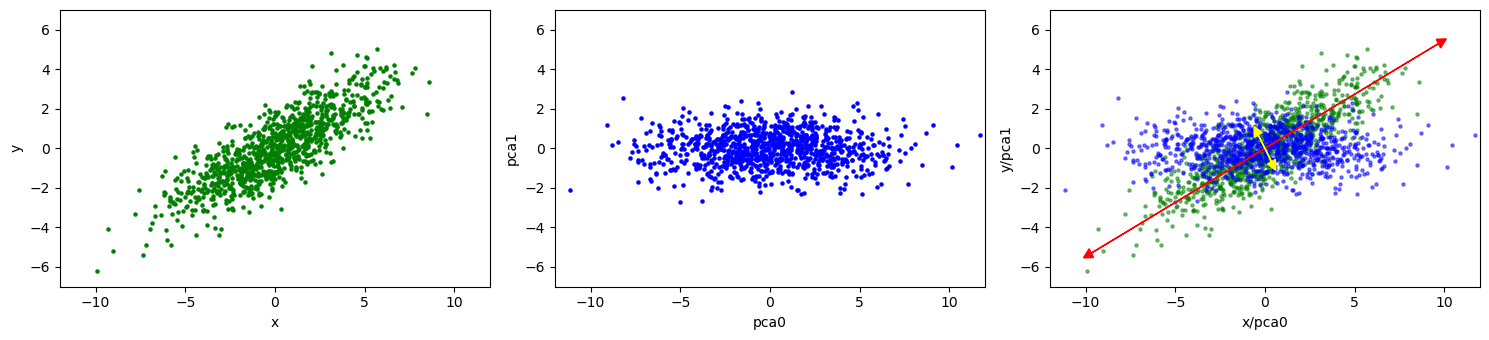

In [5]:
plot_data(X, P, pca)

In [6]:
from scipy.stats import zscore

Z = X.apply(zscore)

In [7]:
pca = PCA(n_components=2)
pca.fit(Z)

P = pd.DataFrame(pca.transform(Z), columns=pca.get_feature_names_out())

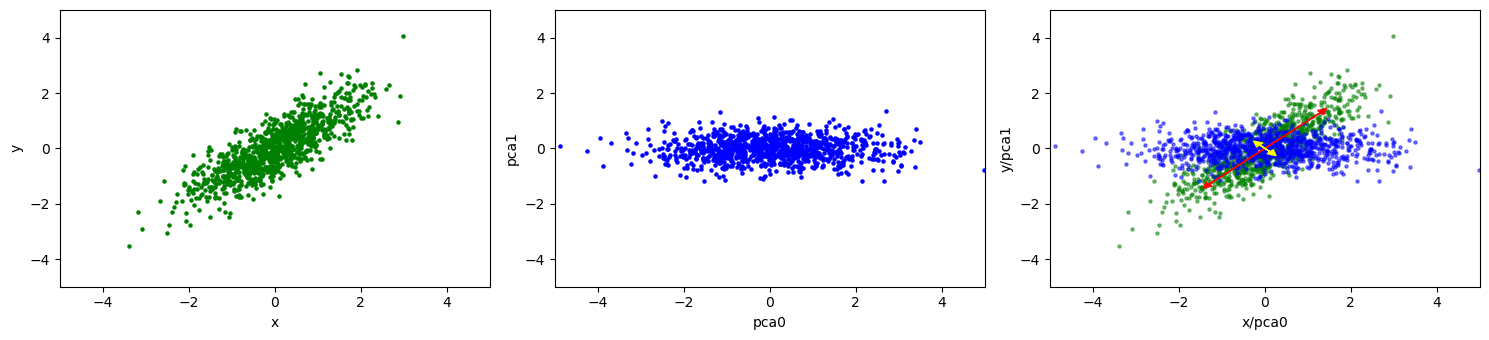

In [8]:
plot_data(Z, P, pca, -5, 5, -5, 5, 0.2, 0.2)